In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('auto-mpg.csv')

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
#preprossing
data.shape

(398, 9)

In [5]:
data.drop('model year',axis=1,inplace=True)

In [6]:
data.drop('car name',axis=1,inplace=True)

In [7]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130,3504,12.0,1
1,15.0,8,350.0,165,3693,11.5,1
2,18.0,8,318.0,150,3436,11.0,1
3,16.0,8,304.0,150,3433,12.0,1
4,17.0,8,302.0,140,3449,10.5,1


In [8]:
#replacing data
data['origin']=data['origin'].replace({1:'america',2:'europe',3:'asia'})

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   origin        398 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 21.9+ KB


In [10]:
#handle the catagorical data
#onehot encoding--here with this we are eleminating catagorical data like objects see origin columns
data=pd.get_dummies(data,columns=['origin'])

In [11]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,1,0,0
1,15.0,8,350.0,165,3693,11.5,1,0,0
2,18.0,8,318.0,150,3436,11.0,1,0,0
3,16.0,8,304.0,150,3433,12.0,1,0,0
4,17.0,8,302.0,140,3449,10.5,1,0,0


In [12]:
h=pd.DataFrame(data.horsepower.str.isdigit())#if string is in digit it will return true
data[h['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,1,0,0
126,21.0,6,200.0,?,2875,17.0,1,0,0
330,40.9,4,85.0,?,1835,17.3,0,0,1
336,23.6,4,140.0,?,2905,14.3,1,0,0
354,34.5,4,100.0,?,2320,15.8,0,0,1
374,23.0,4,151.0,?,3035,20.5,1,0,0


In [13]:
#handle missing value
#imputation technique
#replace missing value with NaN
data=data.replace('?',np.nan)

In [14]:
data[h['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,1,0,0


In [15]:
data.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [16]:
medianfiller=lambda x:x.fillna(x.median())
data=data.apply(medianfiller,axis=0)

In [17]:
data['horsepower']=data['horsepower'].astype('float64')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    float64
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   origin_america  398 non-null    uint8  
 7   origin_asia     398 non-null    uint8  
 8   origin_europe   398 non-null    uint8  
dtypes: float64(4), int64(2), uint8(3)
memory usage: 19.9 KB


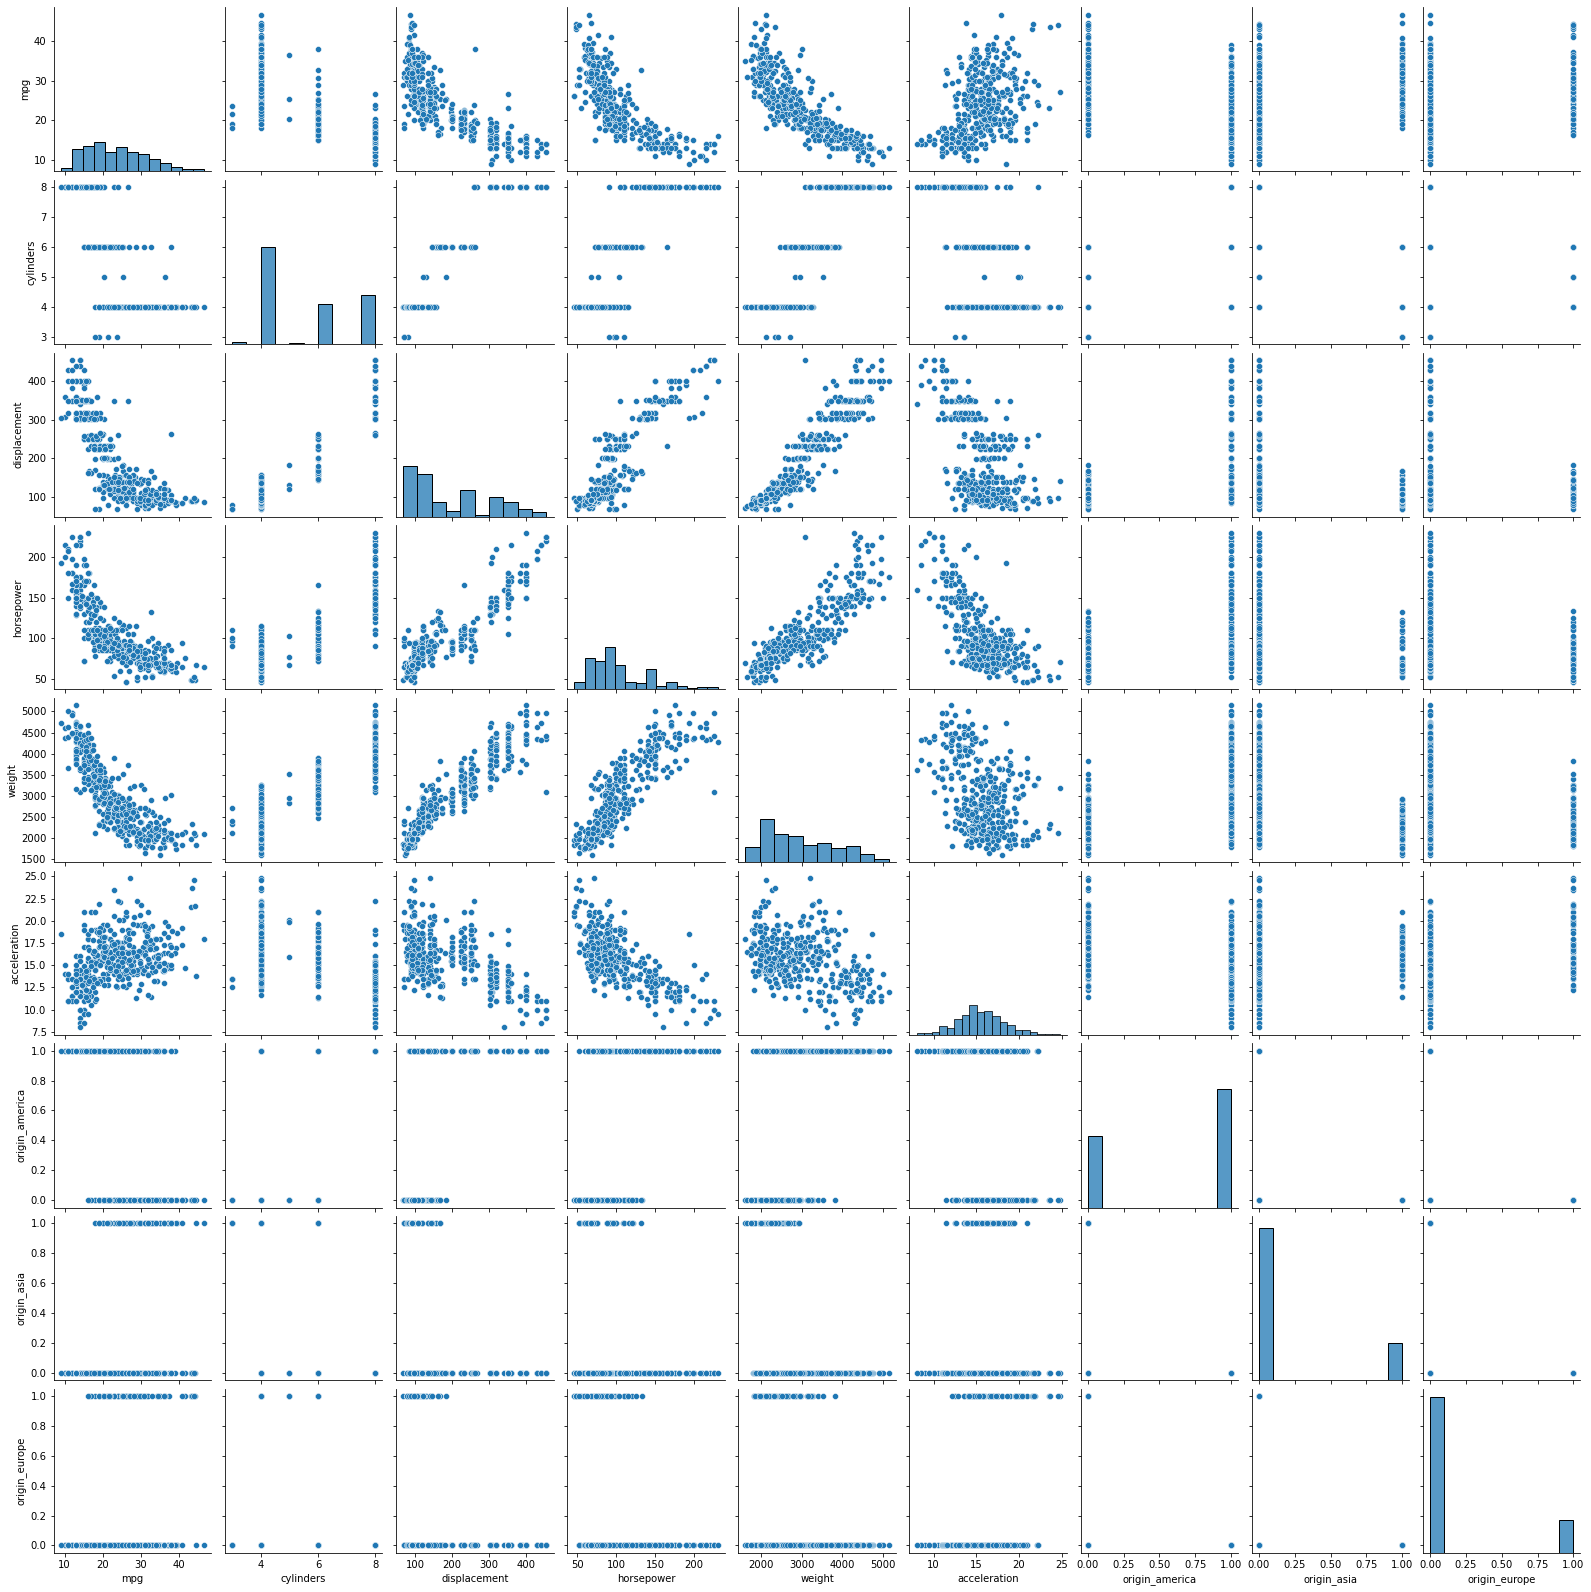

In [19]:
#visualization
sns.pairplot(data)
plt.show()

In [20]:
#Split data in x and y
x=data.drop('mpg',axis=1)
y=data['mpg']

In [21]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration,origin_america,origin_asia,origin_europe
0,8,307.0,130.0,3504,12.0,1,0,0
1,8,350.0,165.0,3693,11.5,1,0,0
2,8,318.0,150.0,3436,11.0,1,0,0
3,8,304.0,150.0,3433,12.0,1,0,0
4,8,302.0,140.0,3449,10.5,1,0,0


In [22]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [23]:
#Split data in train and split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [24]:
#build the model
model=LinearRegression()

In [25]:
model.fit(x_train,y_train)

LinearRegression()

In [26]:
for idx,col_name in enumerate(x_train.columns):
    print('The coefficient for {0}={1}'.format(col_name,model.coef_[idx]))

The coefficient for cylinders=-0.5385175619522502
The coefficient for displacement=0.009552745274875853
The coefficient for horsepower=-0.057276990793058945
The coefficient for weight=-0.005060766643316695
The coefficient for acceleration=-0.04984260331460871
The coefficient for origin_america=-1.0725834448504468
The coefficient for origin_asia=1.1567451175283276
The coefficient for origin_europe=-0.08416167267788136


In [27]:
print(model.intercept_)

46.7661836508904


In [28]:
#check how good is the model build
model.score(x_train,y_train)

0.6946279278265037

In [29]:
model.score(x_test,y_test)

0.7725116212499805

In [30]:
print(model.coef_)

[-0.53851756  0.00955275 -0.05727699 -0.00506077 -0.0498426  -1.07258344
  1.15674512 -0.08416167]


In [31]:
data=pd.read_csv('auto-mpg.csv')

In [32]:
data=data.drop('car name',axis=1)

In [33]:
data['origin']=data['origin'].replace({1:'america',2:'europe',3:'asia'})

In [34]:
data=pd.get_dummies(data,columns=['origin'])

In [35]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [36]:
data=data.replace('?',np.nan)

In [37]:
m=lambda x:x.fillna(x.median())
data=data.apply(m,axis=0)

In [38]:
data['horsepower']=data['horsepower'].astype('float64')

In [39]:
x=data.drop(['mpg','origin_america'],axis=1)
y=data['mpg']

In [40]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europe
0,8,307.0,130.0,3504,12.0,70,0,0
1,8,350.0,165.0,3693,11.5,70,0,0
2,8,318.0,150.0,3436,11.0,70,0,0
3,8,304.0,150.0,3433,12.0,70,0,0
4,8,302.0,140.0,3449,10.5,70,0,0


In [41]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [43]:
model=LinearRegression()

In [44]:
model.fit(x_train,y_train)

LinearRegression()

In [45]:
model.score(x_train,y_train)

0.8141025501610559

In [46]:
model.score(x_test,y_test)

0.8433135132808829

In [47]:
#Forward Feature selection
from mlxtend.feature_selection import SequentialFeatureSelector

In [48]:
f=SequentialFeatureSelector(model,k_features='best',forward=True,n_jobs=-1)

In [49]:
f.fit(x,y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 8),
                          n_jobs=-1, scoring='r2')

In [50]:
features=list(f.k_feature_names_)

In [52]:
features

['cylinders',
 'displacement',
 'weight',
 'model year',
 'origin_asia',
 'origin_europe']

In [53]:
#Backward Elimination method
f=SequentialFeatureSelector(model,k_features='best',forward=False,n_jobs=-1)

In [54]:
f.fit(x,y)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 8), n_jobs=-1, scoring='r2')

In [55]:
features=list(f.k_feature_names_)

In [56]:
features

['cylinders',
 'displacement',
 'weight',
 'model year',
 'origin_asia',
 'origin_europe']